In [117]:
import numpy as np
import os
import pandas as pd
from pylab import *
import openpyxl
from openpyxl import Workbook
import datetime as dt


In [10]:
wb = openpyxl.load_workbook("Huntington Park_Arsenic_1 Hr_from_12-29-2024_to_01-18-2025.xlsx")
st = wb.active

In [66]:
NAME = (2,1)
UNIT = (5, 3) 
TIME_COL = 1
DATA_COL = 2

START = 4
END = 470

In [67]:
st.cell(*NAME).value

'Huntington Park_Arsenic_1 Hr_from_12-29-2024_to_01-18-2025'

In [154]:

def process_file(name="Huntington Park_Arsenic_1 Hr_from_12-29-2024_to_01-18-2025.xlsx"):
    wb = openpyxl.load_workbook(name)
    st = wb.active

    name = st.cell(*NAME).value
    print(name)
    unit = st.cell(*UNIT).value
    print(unit)

    times = []
    data = [] 
    for i in range(START, END):
        val = st.cell(i, DATA_COL).value
        if val == "--": continue
        data.append(val)

        val = st.cell(i, TIME_COL).value
        val = dt.datetime.strptime(val, "%m/%d/%Y %I:%M:%S %p" )
        times.append(val)

    title = name.split("_")[1]
    return times, np.array(data), title, unit

In [155]:
times[384]

datetime.datetime(2025, 1, 14, 0, 0)

Huntington Park_Selenium_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Arsenic_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Vanadium_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_PM Smaller than 10 µm_1 Hr_from_12-29-2024_to_01-18-2025
μg/m3
Huntington Park_Total Chromium_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Ultrafine Particles_1 Hr_from_12-29-2024_to_01-18-2025
counts/cm3
Huntington Park_Cadmium_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Selenium_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Oxides of Nitrogen_1 Hr_from_12-29-2024_to_01-18-2025
ppb
Huntington Park_Lead_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Nitrogen Dioxide_1 Hr_from_12-29-2024_to_01-18-2025
ppb
Huntington Park_Black Carbon_1 Hr_from_12-29-2024_to_01-18-2025
μg/m3
Huntington Park_Wind Speed_1 Hr_from_12-29-2024_to_01-18-2025
MPH
Huntington Park_Nickel_1 Hr_from_12-29-2024_to_01-18-2025
ng/m3
Huntington Park_Titanium_1 Hr_f

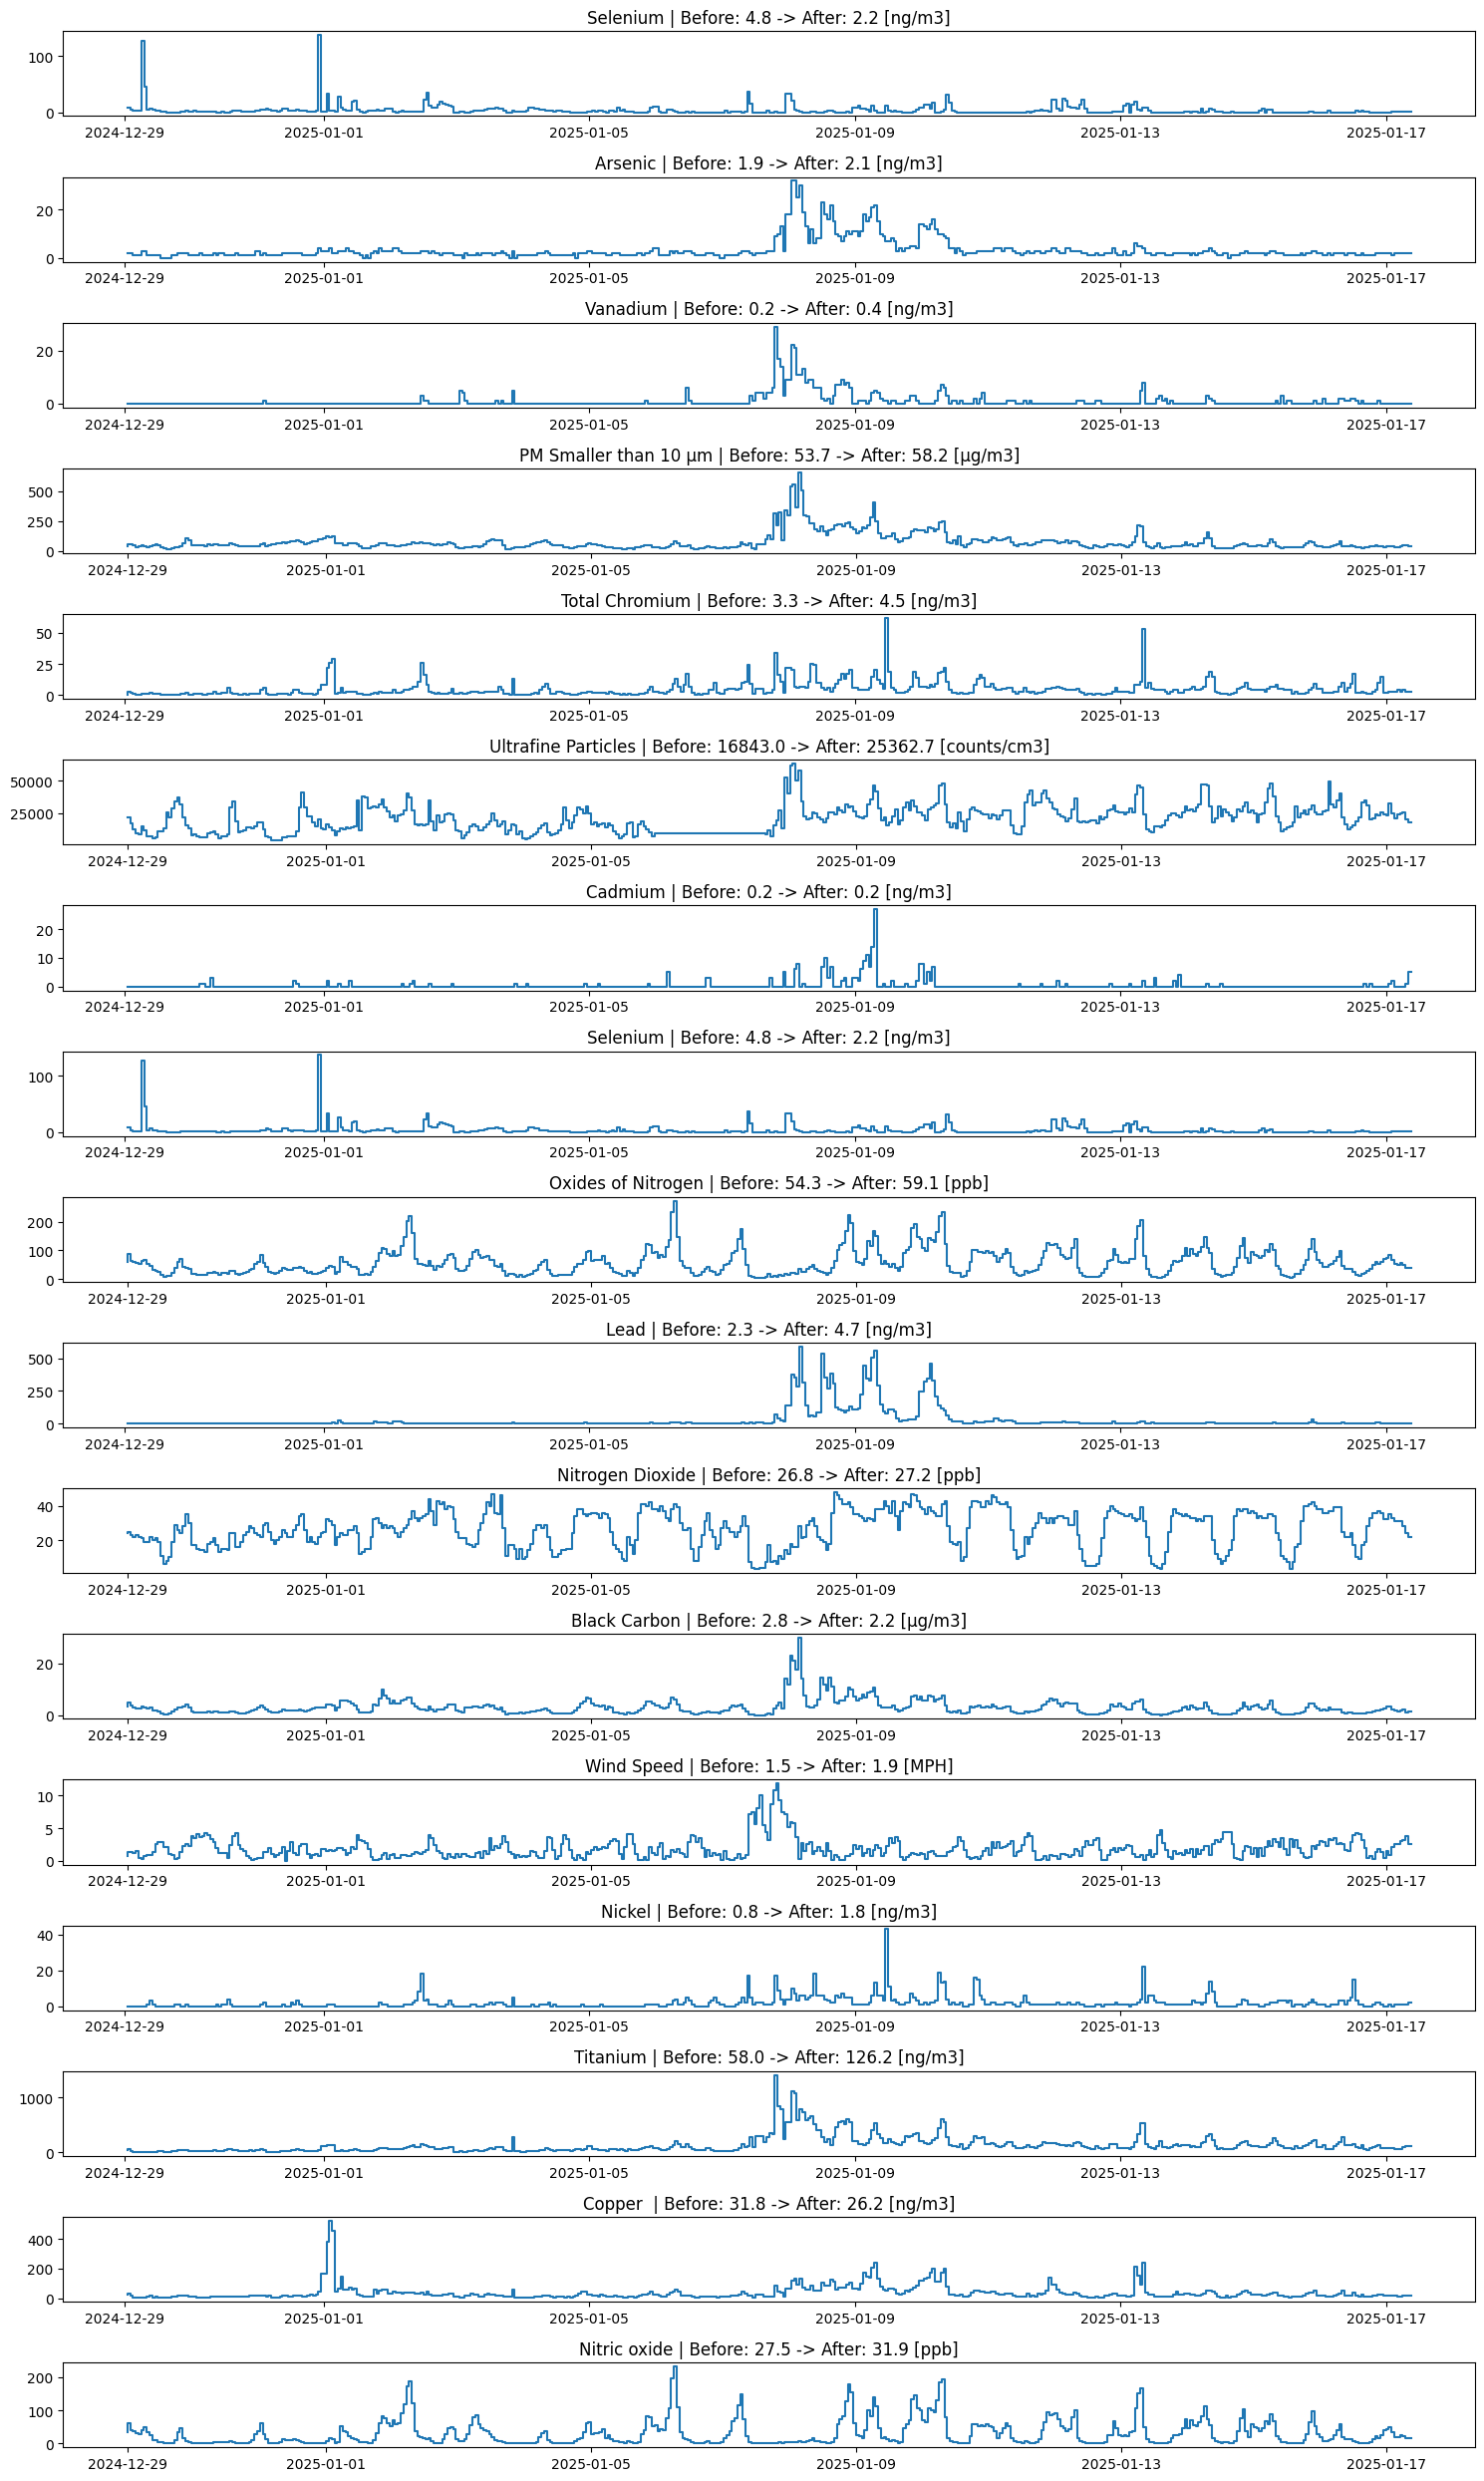

In [156]:
files = [f for f in os.listdir(".") if f.endswith("xlsx")]

N = len(files)


figure(figsize=(15,25))
for ix, file in enumerate(files):
    if not file.startswith("Huntington"): continue

    times, dat, tit, unit = process_file(name=file)
    subplot(N, 1, ix+1)
    step(times, dat)

    bef = np.mean(dat[50:200])
    aft = np.mean(dat[300:450])

    title("%s | Before: %3.1f -> After: %3.1f [%s]" % (tit, bef, aft, unit))

tight_layout()
show()